In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import jaccard_score
import seaborn as sns
import matplotlib.pyplot as plt000
data = pd.read_excel(r"C:\Users\neha hothur\Desktop\ML\Lab 2\19CSE305_LabData_Set3.1.xlsx", sheet_name='thyroid0387_UCI')
data_types = data.dtypes

In [2]:
categorical_cols = data.select_dtypes(include=['object']).columns
nominal_cols = ['referral source'] + [col for col in data.columns if data[col].dtype == 'O' and data[col].str.contains('\?').any()]
ordinal_cols = list(set(categorical_cols) - set(nominal_cols))

numeric_cols = data.select_dtypes(include=['number'])
data_range = numeric_cols.describe().loc[['min', 'max']]

missing_values = data.isna().sum()
outliers = {}
for col in numeric_cols.columns:
    mean = numeric_cols[col].mean()
    std = numeric_cols[col].std()
    lower_bound = mean - 3 * std
    upper_bound = mean + 3 * std
    outliers[col] = len(numeric_cols[(numeric_cols[col] < lower_bound) | (numeric_cols[col] > upper_bound)])

numeric_mean = numeric_cols.mean()
numeric_variance = numeric_cols.var()
print("Task 1: Data Types")
print(data_types)

print("\nTask 2: Encoding Schemes")
print("Nominal Columns:", nominal_cols)
print("Ordinal Columns:", ordinal_cols)

print("\nTask 3: Data Range")
print(data_range)

print("\nTask 4: Missing Values")
print(missing_values)

print("\nTask 5: Outliers")
print(outliers)

print("\nTask 6: Mean and Variance for Numeric Variables")
print("Mean:")
print(numeric_mean)
print("\nVariance:")
print(numeric_variance)

Task 1: Data Types
RecordID                     int64
age                          int64
sex                         object
onthyroxine                 object
queryonthyroxine            object
onantithyroidmedication     object
sick                        object
pregnant                    object
thyroidsurgery              object
I131treatment               object
queryhypothyroid            object
queryhyperthyroid           object
lithium                     object
goitre                      object
tumor                       object
hypopituitary               object
psych                       object
TSHmeasured                 object
TSH                        float64
T3measured                  object
T3                         float64
TT4measured                 object
TT4                        float64
T4Umeasured                 object
T4U                        float64
FTImeasured                 object
FTI                        float64
TBGmeasured                 object
T

In [3]:
for col in data.columns:
    if col in nominal_cols:
        if col in ['TSH', 'T3', 'TT4', 'T4U', 'FTI']:
            data[col].fillna(data[col].median(), inplace=True)
        else:
            data[col].fillna(data[col].mean(), inplace=True)
    else:
        data[col].fillna(data[col].mode()[0], inplace=True)

missing_values_after_imputation = data.isnull().sum()

print("Missing Values After Imputation:")
print(missing_values_after_imputation)

Missing Values After Imputation:
RecordID                   0
age                        0
sex                        0
onthyroxine                0
queryonthyroxine           0
onantithyroidmedication    0
sick                       0
pregnant                   0
thyroidsurgery             0
I131treatment              0
queryhypothyroid           0
queryhyperthyroid          0
lithium                    0
goitre                     0
tumor                      0
hypopituitary              0
psych                      0
TSHmeasured                0
TSH                        0
T3measured                 0
T3                         0
TT4measured                0
TT4                        0
T4Umeasured                0
T4U                        0
FTImeasured                0
FTI                        0
TBGmeasured                0
TBG                        0
referralsource             0
Condition                  0
dtype: int64


In [4]:
numeric_attributes = ['age', 'TSH', 'T3', 'TT4', 'T4U', 'FTI']

minmax_scaler = MinMaxScaler()
data[numeric_attributes] = minmax_scaler.fit_transform(data[numeric_attributes])

print("Normalized Data:")
print(data.head())

Normalized Data:
    RecordID       age sex onthyroxine queryonthyroxine  \
0  840801013  0.291667   F           f                f   
1  840801014  0.291667   F           f                f   
2  840801042  0.416667   F           f                f   
3  840803046  0.364583   F           f                f   
4  840803047  0.322917   F           f                f   

  onantithyroidmedication sick pregnant thyroidsurgery I131treatment  ...  \
0                       f    f        f              f             f  ...   
1                       f    f        f              f             f  ...   
2                       f    f        f              f             f  ...   
3                       f    f        f              f             f  ...   
4                       f    f        f              f             f  ...   

  TT4measured       TT4 T4Umeasured      T4U FTImeasured       FTI  \
0           f  0.283708           f  0.46988           f  0.106993   
1           t  0.351124  

In [5]:

nominal = ['sex','Condition','onthyroxine', 'queryonthyroxine', 'onantithyroidmedication',
                     'sick', 'pregnant', 'thyroidsurgery', 'I131treatment', 'queryhypothyroid',
                     'queryhyperthyroid', 'lithium', 'goitre', 'tumor', 'hypopituitary']
nominal_encoded = pd.get_dummies(data,columns=nominal)
data=nominal_encoded
v1 = data['sex_M']
v2 = data['Condition_M']
f01 = sum([1 for a, b in zip(v1, v2) if a == 0 and b == 1])
f11 = sum([1 for a, b in zip(v1, v2) if a == b == 1])
f00 = sum([1 for a, b in zip(v1, v2) if a == b == 0])
f10 = sum([1 for a, b in zip(v1, v2) if a == 1 and b == 0])
print(f00,f01,f10,f11)
jc=0
if f01 + f10 + f11 !=0:
    jc = f11 / (f01 + f10 + f11)
else:
    jc=0
print("Jaccard Coefficient (JC):", jc)

685 11 301 3
Jaccard Coefficient (JC): 0.009523809523809525


Cosine Similarity: 0.04598545046137244


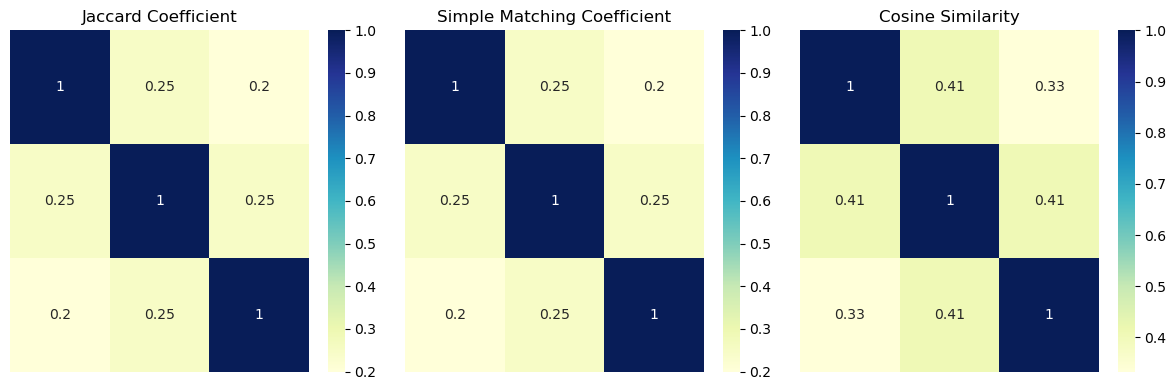

In [6]:
v2 = np.array(v2).reshape(1, -1)
v1 = np.array(v1).reshape(1, -1)
cosine_sim = cosine_similarity(v1, v2)
print("Cosine Similarity:", cosine_sim[0][0])

vectors = [
    [1, 0, 1, 1, 0],
    [0, 1, 1, 0, 0],
    [1, 1, 0, 0, 1],
    
]
n = len(vectors)
jc_matrix = np.zeros((n, n))
smc_matrix = np.zeros((n, n))
cos_matrix = np.zeros((n, n))

for i in range(n):
    for j in range(n):
        jc_matrix[i][j] = jaccard_score(vectors[i], vectors[j])
        smc_matrix[i][j] = np.sum(np.logical_and(vectors[i], vectors[j])) / np.sum(np.logical_or(vectors[i], vectors[j]))
        cos_matrix[i][j] = cosine_similarity([vectors[i]], [vectors[j]])[0][0]


plt.figure(figsize=(12, 4))

plt.subplot(131)
sns.heatmap(jc_matrix, annot=True, cmap="YlGnBu", xticklabels=False, yticklabels=False)
plt.title('Jaccard Coefficient')

plt.subplot(132)
sns.heatmap(smc_matrix, annot=True, cmap="YlGnBu", xticklabels=False, yticklabels=False)
plt.title('Simple Matching Coefficient')

plt.subplot(133)
sns.heatmap(cos_matrix, annot=True, cmap="YlGnBu", xticklabels=False, yticklabels=False)
plt.title('Cosine Similarity')

plt.tight_layout()
plt.show()
